## Actividad 1 - Guia 1

#### Proyecto 1 – Relación Minutos Ingreso

Integrantes: 
* Victor Andres Vargas Niño
* Melissa Garcia Herrera

#### Descripción del problema

Evaluaremos la información del conjunto de registros Credito_dias.csv de una empresa de telecomunicaciones que cuenta las siguientes variables:

* totrev: Ingresos del cliente.
* totmou: Total de minutos usados por el cliente.
* creditcd: Indicador de tarjeta de crédito.
* eqpdays: Número de días (antigüedad) del equipo actual.

#### Librerias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib import request

#### Carga de los datos

In [2]:
url = 'https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv'
df = pd.read_csv(url)
df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


#### 5. Incluyan un exploratorio separado por cada una de las variables que se tienen en esta base se sugiere que use histogramas para las variables numéricas y diagramas de barras para las categóricas.

In [4]:
df[['totmou','totrev','eqpdays']].describe()

,totmou,totrev,eqpdays
count,10000.000000,10000.000000,10000.000000
mean,7692.804866,1042.133807,386.794500
std,8657.917883,857.144895,252.720196
min,0.000000,11.100000,-5.000000
25%,2576.000000,526.787500,210.000000
50%,5262.000000,820.235000,338.000000
75%,9823.250000,1272.975000,522.000000
max,163264.176700,13426.600000,1823.000000


In [5]:
df[['totmou','totrev','eqpdays']].mode()

,totmou,totrev,eqpdays
0,1581.0,552.6,313.0
1,1710.0,NaN,NaN
2,4106.0,NaN,NaN
3,6891.0,NaN,NaN


C:\Users\VivoBook\AppData\Local\Temp\ipykernel_17780\3402602674.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_17780\3402602674.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_17780\3402602674.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=i, palette="ocean")
C:\Users\VivoBook\AppData\Local\Temp\ipykernel_17780\3402602674.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=i, bins=50, palette="

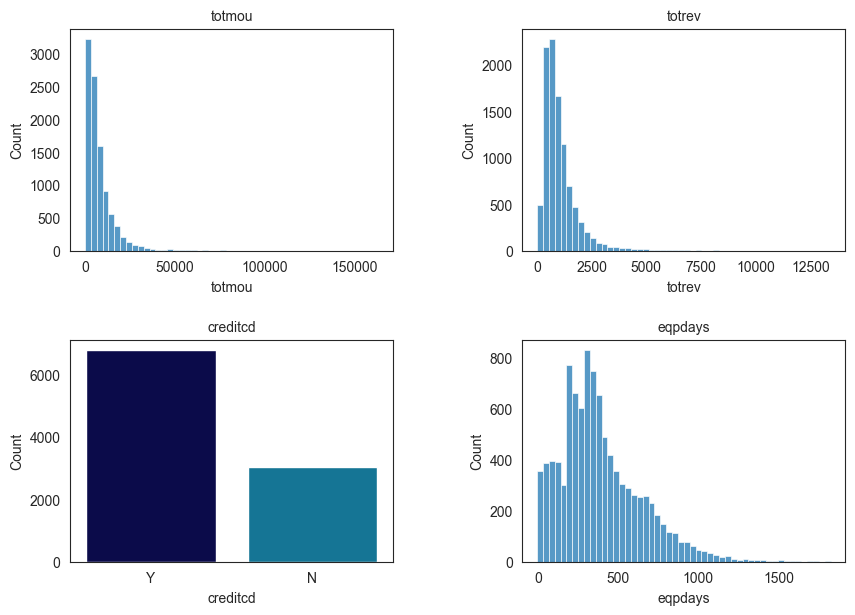

In [6]:
plt.figure(figsize = [10, 15]) # largo de la figura de subplot
sns.set_style("white")

columnas = df.columns.tolist()
conteo=1

for i in columnas:
    if i in ('Customer_ID'):
        pass
    else:
        plt.subplot(4, 2, conteo)  # Ajustar el número de filas en el primer argumento
        if df[i].dtype == 'object':
            sns.countplot(data=df, x=i, palette="ocean")
            plt.title(i,fontsize=10)
            plt.ylabel("Count")
        else:
            sns.histplot(data=df, x=i, bins=50, palette="ocean")  # Ajustar el número de bins según sea necesario
            plt.title(i,fontsize=10)
            plt.ylabel("Count")
            plt.xlabel(i)
        conteo += 1

plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Ajustar el espacio vertical entre subplots
plt.show()

#### 6. Hagan un diagrama de dispersión entre las variables totrev y totmou. Posterior a la realización de este gráfico desarrolle una conclusión.

0.8354845922593952


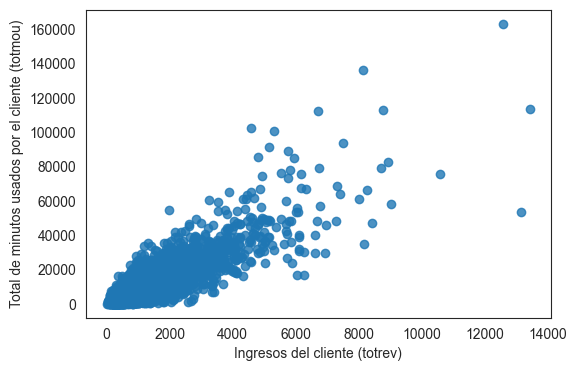

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x='totrev', y='totmou', data=df, alpha= 0.8)
ax.set_xlabel('Ingresos del cliente (totrev)')
ax.set_ylabel('Total de minutos usados por el cliente (totmou)')
print(df['totrev'].corr(df['totmou']))

Como se puede observar en el grafico existe una relación positiva entre los ingresos del cliente y el total de minutos usados por el cliente. Tambien se puede observar que la concentración de los valores para estas dos variables estan entre 0 y 4.000. Ademas que la correlación entre estas variables es de 0,835

#### 7. Respondan ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Si, segun el grafico anterior y el indice de correlación se evidencia que hay una relación positiva fuerte entre estas dos variables, es decir que si los ingresos del cliente aumentan el total de minutos usados por cliente tambien aumenta.

#### 8.El hecho de tener crédito afecta alguna de estas dos variables, compruébenlo incluyendo en el diagrama de dispersión una leyenda que indique si tiene crédito o no.

<Axes: xlabel='totrev', ylabel='totmou'>

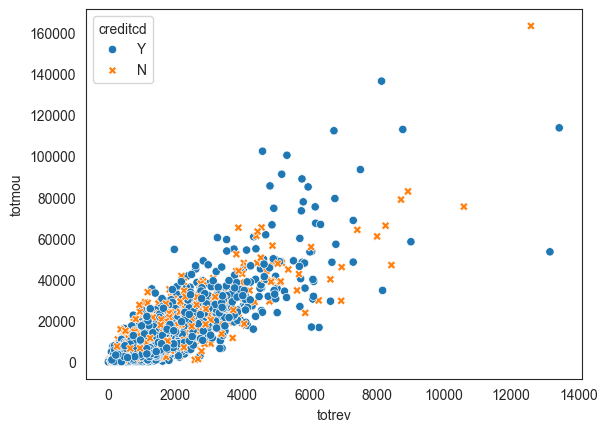

In [8]:
sns.scatterplot(x='totrev', y='totmou', data=df, hue='creditcd', style='creditcd')

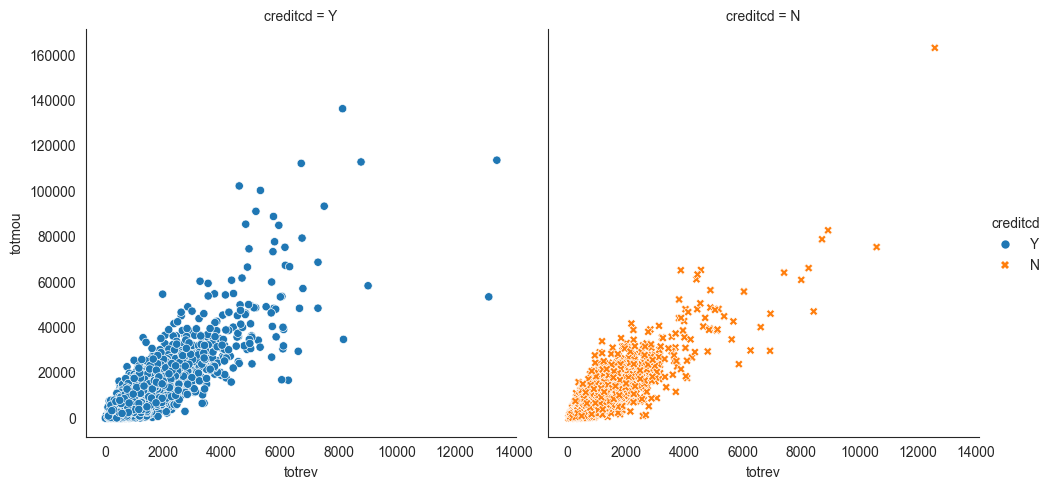

In [14]:
sns.relplot(
    data=df, x="totrev", y="totmou",
    col="creditcd", hue="creditcd", style="creditcd",
    kind="scatter"
)

El hecho de tener crédito no afecta alguna de las variables analizadas ya que al observar el grafico la dispersión de los datos entre los clientes que tienen credito y los que no es muy similar.